In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Setting visualization style
sns.set(style="whitegrid")

In [4]:
#datasets
customers = pd.read_csv("./datasets/Customers.csv")
products = pd.read_csv("./datasets/Products.csv")
transactions = pd.read_csv("./datasets/Transactions.csv")

In [6]:
# Displaying heads for each dataset
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [7]:
def check_missing_values(df, name):
    print(f"Missing values in {name}:")
    print(df.isnull().sum())
    print("\n")

In [8]:
check_missing_values(customers, "Customers")
check_missing_values(products, "Products")
check_missing_values(transactions, "Transactions")

Missing values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


Missing values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


Missing values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64




In [9]:
# Converting date columns to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
# Checking data types and converting if necessary
def check_data_types(df, name):
    print(f"Data types in {name}:")
    print(df.dtypes)
    print("\n")

In [11]:
check_data_types(customers, "Customers")
check_data_types(products, "Products")
check_data_types(transactions, "Transactions")

Data types in Customers:
CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object


Data types in Products:
ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object


Data types in Transactions:
TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object




In [12]:
# Summary statistics for numerical columns
def summary_statistics(df, name):
    print(f"Summary statistics for {name}:")
    print(df.describe())
    print("\n")

In [14]:
summary_statistics(customers, "Customers")

Summary statistics for Customers:
                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00




In [16]:
summary_statistics(products, "Products")

Summary statistics for Products:
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000




In [17]:
summary_statistics(transactions, "Transactions")

Summary statistics for Transactions:
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639




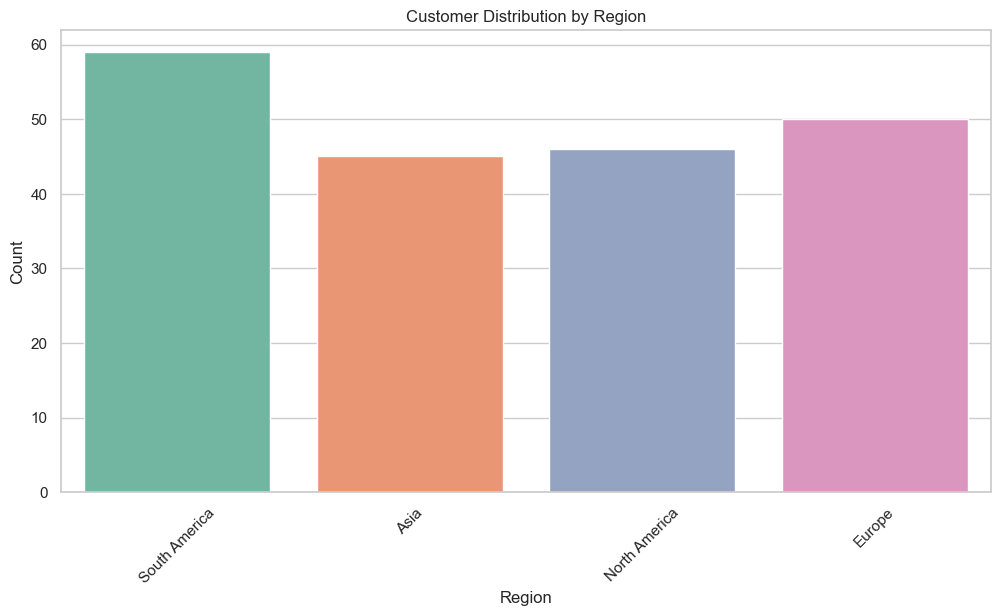

In [18]:
# Univariate Analysis: Visualizing distributions
plt.figure(figsize=(12, 6))
sns.countplot(x='Region', data=customers, palette='Set2')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

C:\Users\virus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


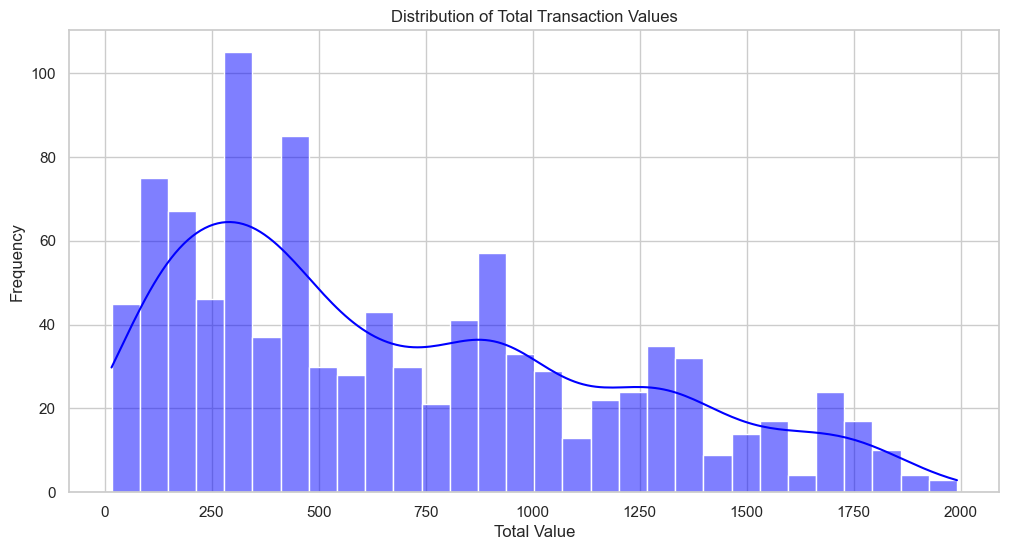

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(transactions['TotalValue'], kde=True, bins=30, color='blue')
plt.title("Distribution of Total Transaction Values")
plt.xlabel("Total Value")
plt.ylabel("Frequency")
plt.show()

C:\Users\virus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\virus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\virus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


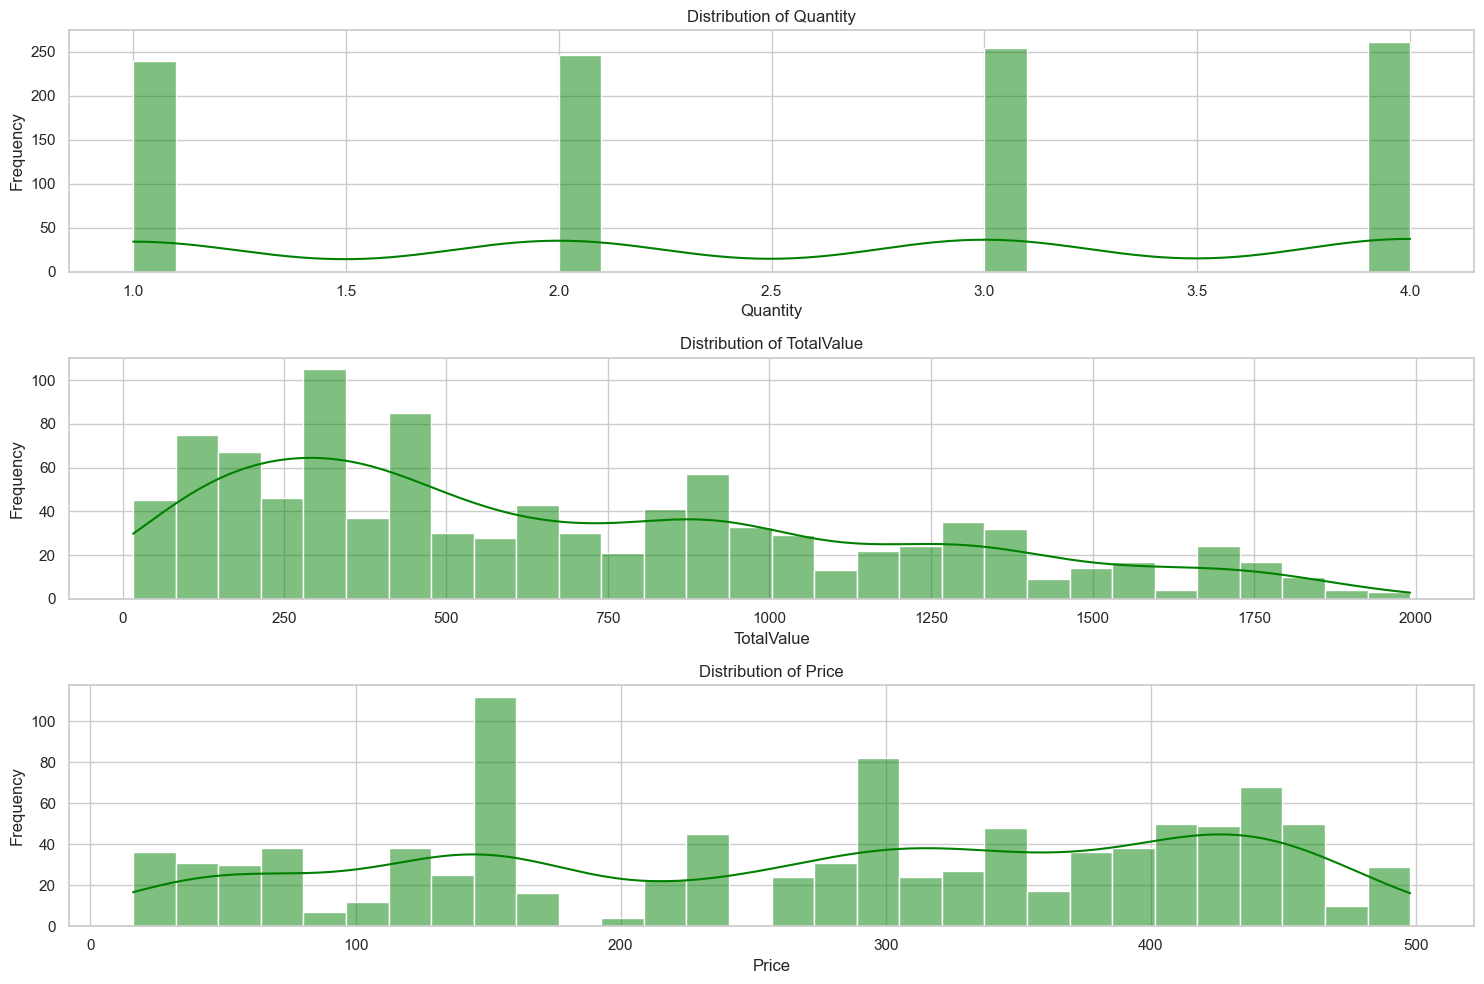

In [20]:
# Checking for anomalies in numerical distributions
numerical_columns = ['Quantity', 'TotalValue', 'Price']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 1, i + 1)
    sns.histplot(transactions[col], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

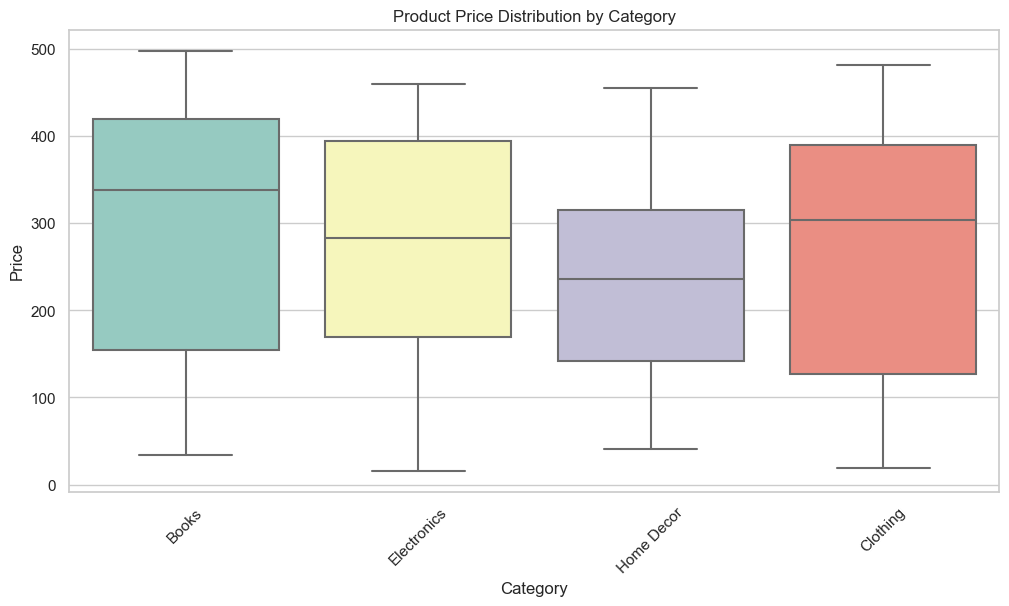

In [21]:
# Bivariate Analysis: Exploring relationships
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products, palette='Set3')
plt.title("Product Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

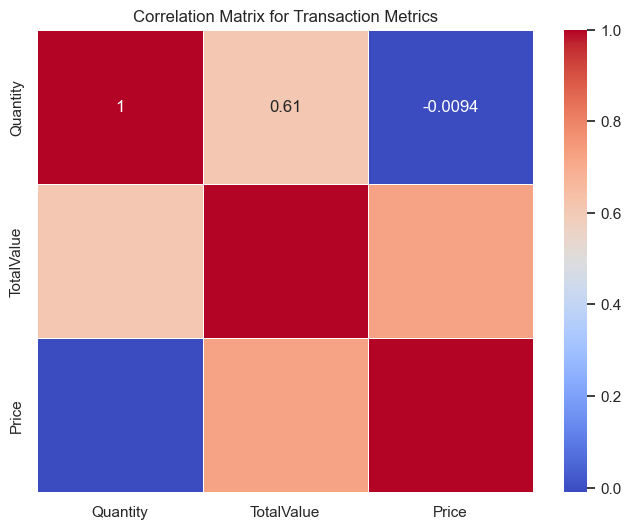

In [22]:
# Correlation Heatmap
correlation_matrix = transactions[['Quantity', 'TotalValue', 'Price']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix for Transaction Metrics")
plt.show()

In [23]:
# Business Insights
# Insight 1: Regions with the highest number of customers.
region_counts = customers['Region'].value_counts()
print("Customer count by region:")
print(region_counts)

Customer count by region:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [24]:
# Insight 2: Most popular product categories and their average price.
popular_categories = products.groupby('Category').agg({
    'ProductID': 'count',
    'Price': 'mean'
}).rename(columns={'ProductID': 'Count', 'Price': 'AveragePrice'})
print("\nPopular product categories and their average price:")
print(popular_categories)


Popular product categories and their average price:
             Count  AveragePrice
Category                        
Books           26    292.212308
Clothing        25    263.720000
Electronics     26    275.353462
Home Decor      23    235.020000


In [25]:
# Insight 3: Seasonal trends in transaction volume.
transactions['Month'] = transactions['TransactionDate'].dt.month
monthly_transactions = transactions['Month'].value_counts().sort_index()
print("\nMonthly transaction volume:")
print(monthly_transactions)


Monthly transaction volume:
Month
1     107
2      77
3      80
4      86
5      86
6      69
7      96
8      94
9      96
10     70
11     57
12     82
Name: count, dtype: int64


In [26]:
# Insight 4: High-value transactions and their characteristics.
high_value_transactions = transactions[transactions['TotalValue'] > transactions['TotalValue'].quantile(0.9)]
print("\nHigh-value transactions:")
print(high_value_transactions.describe())


High-value transactions:
                     TransactionDate   Quantity   TotalValue       Price  \
count                            100  100.00000   100.000000  100.000000   
mean   2024-07-05 16:06:34.339999744    3.92000  1659.154400  424.658200   
min              2023-12-31 06:53:54    3.00000  1419.240000  354.810000   
25%              2024-04-12 17:22:02    4.00000  1541.480000  396.340000   
50%       2024-07-14 04:44:07.500000    4.00000  1667.540000  423.880000   
75%    2024-09-19 10:05:53.750000128    4.00000  1750.600000  448.610000   
max              2024-12-26 06:46:12    4.00000  1991.040000  497.760000   
std                              NaN    0.27266   134.947336   37.149458   

            Month  
count  100.000000  
mean     6.800000  
min      1.000000  
25%      4.000000  
50%      7.000000  
75%      9.250000  
max     12.000000  
std      3.440695  


In [27]:
# Insight 5: Average customer lifetime value (CLV).
customer_clv = transactions.groupby('CustomerID')['TotalValue'].sum()
avg_clv = customer_clv.mean()
print("\nAverage Customer Lifetime Value (CLV):")
print(avg_clv)


Average Customer Lifetime Value (CLV):
3467.314371859297
